In [57]:
# 1. Use case
# Let's build a neural network to identify hand-written digits using MINIST database

In [58]:
# 3. softmax激活函数
# softmax(Ln) = e^Ln/(e^L1+e^L2+....)

In [59]:
# 下载mnist 数据集
# 1. import Minist data using tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
mnist = tf.keras.datasets.mnist

In [60]:
# Loading the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train/255.0, x_test/255.0

In [61]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test[:2]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
# Number of images for training and testing
print('Train samples count: ', x_train.shape[0])
print('Test samples count: ', x_test.shape[0])

Train samples count:  60000
Test samples count:  10000


In [63]:
# 可视化数据
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
x_train[1].shape

(28, 28)

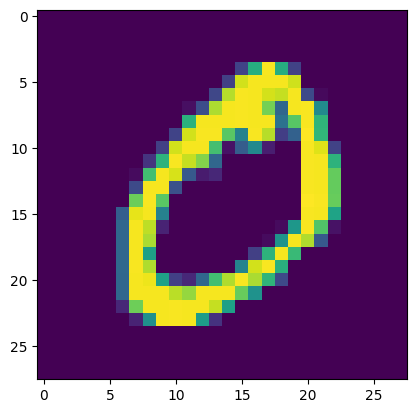

In [65]:
plt.imshow(x_train[1])

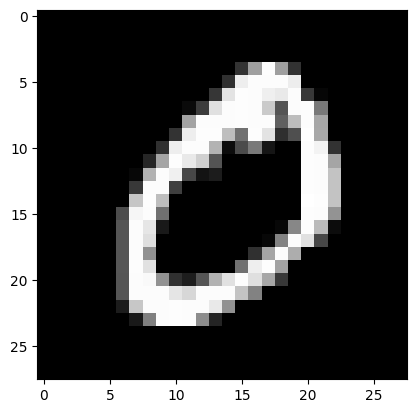

In [66]:
# 也可以看灰度图
plt.imshow(x_train[1], cmap='gist_gray')

In [67]:
# Maximum and minimum value of the pixels in the image
print('Max pixel in the image: ', x_train[1].max())
print('Min pixel in the image: ', x_train[1].min())

Max pixel in the image:  1.0
Min pixel in the image:  0.0


In [68]:
# 构建模型，一个简单的神经网络 
from tensorflow.keras.layers import Flatten, Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# 定义一个回调函数来保存验证集上表现最好的模型
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, 
                        steps_per_epoch=80,
                        epochs=50,
                        validation_data=(x_test, y_test),
                        validation_steps=2000,
                        callbacks=[checkpoint_callback])

Epoch 1/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4278 - loss: 1.8707
Epoch 1: val_loss improved from inf to 0.76629, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4851 - loss: 1.7466 - val_accuracy: 0.8393 - val_loss: 0.7663
Epoch 2/50

Epoch 2: val_loss improved from 0.76629 to 0.00000, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
39/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.7442

2024-04-22 01:36:47.101540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-22 01:36:47.111626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.7125
Epoch 3: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8433 - loss: 0.7103 - val_accuracy: 0.8759 - val_loss: 0.5308
Epoch 4/50

Epoch 4: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
43/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.5394

2024-04-22 01:36:48.888686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:48.895815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


66/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.5324
Epoch 5: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8698 - loss: 0.5282 - val_accuracy: 0.8906 - val_loss: 0.4434
Epoch 6/50

Epoch 6: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
40/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.4522

2024-04-22 01:36:50.607208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:50.612901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 0.4491
Epoch 7: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8866 - loss: 0.4490 - val_accuracy: 0.8978 - val_loss: 0.3969
Epoch 8/50

Epoch 8: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
48/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.4041

2024-04-22 01:36:52.345396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:52.351163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


74/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.4031
Epoch 9: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8953 - loss: 0.4029 - val_accuracy: 0.9045 - val_loss: 0.3678
Epoch 10/50

Epoch 10: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/50
45/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.3868

2024-04-22 01:36:54.108430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:54.114361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


65/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8979 - loss: 0.3842
Epoch 11: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8984 - loss: 0.3829 - val_accuracy: 0.9068 - val_loss: 0.3477
Epoch 12/50

Epoch 12: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/50
38/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9055 - loss: 0.3618

2024-04-22 01:36:56.103561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:56.111031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


76/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9050 - loss: 0.3601
Epoch 13: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9050 - loss: 0.3598 - val_accuracy: 0.9110 - val_loss: 0.3332
Epoch 14/50

Epoch 14: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/50
43/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3562

2024-04-22 01:36:57.982895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:57.989150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9065 - loss: 0.3514
Epoch 15: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9066 - loss: 0.3511 - val_accuracy: 0.9125 - val_loss: 0.3224
Epoch 16/50

Epoch 16: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/50
41/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9097 - loss: 0.3343

2024-04-22 01:36:59.929101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:36:59.935948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9096 - loss: 0.3344
Epoch 17: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9096 - loss: 0.3342 - val_accuracy: 0.9148 - val_loss: 0.3139
Epoch 18/50

Epoch 18: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/50
45/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.3294

2024-04-22 01:37:01.829483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:01.835632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


67/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9111 - loss: 0.3278
Epoch 19: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9113 - loss: 0.3268 - val_accuracy: 0.9154 - val_loss: 0.3071
Epoch 20/50

Epoch 20: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/50
39/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9168 - loss: 0.3144

2024-04-22 01:37:03.790800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:03.796476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


73/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9158 - loss: 0.3146
Epoch 21: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9156 - loss: 0.3145 - val_accuracy: 0.9160 - val_loss: 0.3010
Epoch 22/50

Epoch 22: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/50
44/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9135 - loss: 0.3150

2024-04-22 01:37:05.951353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:05.959365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


63/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9143 - loss: 0.3132
Epoch 23: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9146 - loss: 0.3122 - val_accuracy: 0.9171 - val_loss: 0.2971
Epoch 24/50

Epoch 24: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/50
48/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9161 - loss: 0.3039

2024-04-22 01:37:07.908531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:07.914008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9164 - loss: 0.3034
Epoch 25: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9166 - loss: 0.3033 - val_accuracy: 0.9181 - val_loss: 0.2932
Epoch 26/50

Epoch 26: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/50
47/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.3051

2024-04-22 01:37:09.665500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:09.671078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9149 - loss: 0.3031
Epoch 27: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9154 - loss: 0.3022 - val_accuracy: 0.9199 - val_loss: 0.2892
Epoch 28/50

Epoch 28: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/50
46/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2952

2024-04-22 01:37:11.506135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:11.513391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


66/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2948
Epoch 29: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9188 - loss: 0.2946 - val_accuracy: 0.9211 - val_loss: 0.2862
Epoch 30/50

Epoch 30: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/50
44/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2899

2024-04-22 01:37:13.278302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:13.284830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


65/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9199 - loss: 0.2892
Epoch 31: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9199 - loss: 0.2892 - val_accuracy: 0.9222 - val_loss: 0.2836
Epoch 32/50

Epoch 32: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/50
52/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9189 - loss: 0.2901

2024-04-22 01:37:15.534217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:15.540449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2892
Epoch 33: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9196 - loss: 0.2891 - val_accuracy: 0.9226 - val_loss: 0.2815
Epoch 34/50

Epoch 34: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/50
45/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9213 - loss: 0.2791

2024-04-22 01:37:17.689813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:17.697061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


67/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9218 - loss: 0.2792
Epoch 35: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9219 - loss: 0.2798 - val_accuracy: 0.9222 - val_loss: 0.2796
Epoch 36/50

Epoch 36: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/50
51/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.2750

2024-04-22 01:37:19.509029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:19.515378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9248 - loss: 0.2771
Epoch 37: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9246 - loss: 0.2774 - val_accuracy: 0.9224 - val_loss: 0.2777
Epoch 38/50

Epoch 38: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/50
50/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2841

2024-04-22 01:37:21.316493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:21.325090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


74/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.2834
Epoch 39: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9213 - loss: 0.2830 - val_accuracy: 0.9227 - val_loss: 0.2758
Epoch 40/50

Epoch 40: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/50
46/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9229 - loss: 0.2766

2024-04-22 01:37:23.271219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:23.278455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


67/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9231 - loss: 0.2766
Epoch 41: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9232 - loss: 0.2766 - val_accuracy: 0.9228 - val_loss: 0.2749
Epoch 42/50

Epoch 42: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/50
46/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9268 - loss: 0.2642

2024-04-22 01:37:25.326908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:25.333386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2669
Epoch 43: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9257 - loss: 0.2681 - val_accuracy: 0.9242 - val_loss: 0.2737
Epoch 44/50

Epoch 44: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/50
51/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9256 - loss: 0.2717

2024-04-22 01:37:27.194328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:27.200566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9251 - loss: 0.2720
Epoch 45: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9250 - loss: 0.2720 - val_accuracy: 0.9245 - val_loss: 0.2726
Epoch 46/50

Epoch 46: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/50
50/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9238 - loss: 0.2774

2024-04-22 01:37:29.133372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:29.141080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


73/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.2755
Epoch 47: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9243 - loss: 0.2750 - val_accuracy: 0.9251 - val_loss: 0.2714
Epoch 48/50

Epoch 48: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/50
49/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9271 - loss: 0.2633

2024-04-22 01:37:31.071902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:31.078035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


72/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.2648
Epoch 49: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9264 - loss: 0.2652 - val_accuracy: 0.9254 - val_loss: 0.2702
Epoch 50/50

Epoch 50: val_loss did not improve from 0.00000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-22 01:37:32.877035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 01:37:32.883531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [14]:
model = tf.keras.models.load_model('./best_model.keras')

label: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
prediction: [7 2 1 0 4 1 4 9 4 7 0 6 9 0 1 5 9 7 3 4]


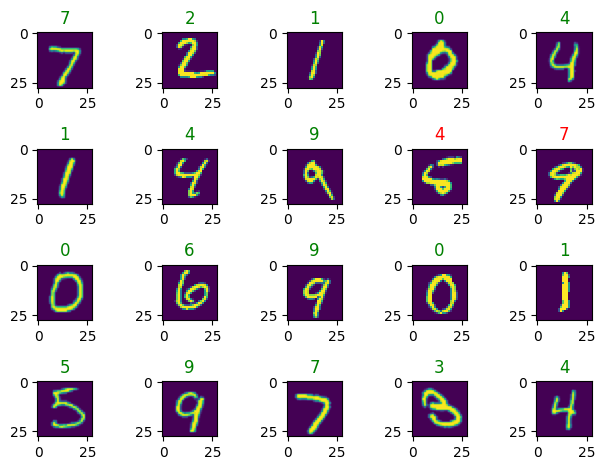

In [56]:
label = tf.argmax(y_test[:20], axis=1)
print("label: {}".format(label))
y_pred = model.predict(x_test[:20].reshape(-1, 28, 28))
prediction = tf.argmax(y_pred, axis=1)
print("prediction: {}".format(prediction))

plt.figure()
for i in range(1,21):
    plt.subplot(4,5,i)
    label_i = int(label[i-1])
    predict_i = int(prediction[i-1])
    color_ = 'red' if label_i != predict_i else 'green'
    plt.title(predict_i, color=color_)
    plt.imshow(x_test[i-1])

plt.tight_layout()